In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

## EXERCISE: Read, Display and Write an Image

In [2]:
"""
Write a program to read the image 'sample.jpg' in BGR and Grayscale separately
display them and save the Grayscale image as 'sample_BW.jpg'
"""
def display_img(file_path):
    
    #Read Images
    grayscale = cv2.imread(file_path,0)
    bgrscale = cv2.imread(file_path,1)
    
    #Display images
    fig,ax = plt.subplots(1,2,figsize=(10,10))
    ax[0].imshow(grayscale,cmap='gray')
    ax[0].set_title('Grayscale')
    ax[1].imshow(bgrscale)
    ax[1].set_title('BGR')    

    #Save Image
    cv2.imwrite('sample_BW.jpg', grayscale)

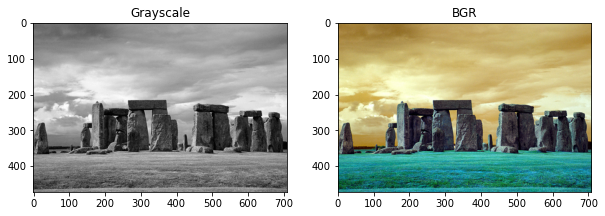

In [3]:
file_path = 'CV_PS_imgs/sample_imgs/sample.jpg'
display_img(file_path)

## EXERCISE: Change Color Spaces

In [4]:
"""
Using the functions described above, write a program to read the image 'hat_lady.png' in BGR convert them to
GRAY and HSV, use numpy slicing to store hue, saturation and value channels separately in variables, display 
all the images (except the input) in separate windows. 
"""

def color_space(file_path):
    
    #read the image
    hat_lady = cv2.imread(file_path,1)
    
    #Convert color spaces to Gray and HSV
    bgrtogray = cv2.cvtColor(hat_lady,cv2.COLOR_BGR2GRAY)
    bgrtohsv = cv2.cvtColor(hat_lady,cv2.COLOR_BGR2HSV)
    
    #Slice the arrays
    hsv_hue = bgrtohsv[...,0]
    hsv_saturation = bgrtohsv[...,1]
    hsv_value = bgrtohsv[...,2]
    
    #Display images
    fig,ax = plt.subplots(2,2,figsize=(10,10))
    ax[0,0].imshow(hsv_hue,cmap='gray')
    ax[0,0].set_title('Hue')
    ax[0,1].imshow(hsv_saturation,cmap='gray')
    ax[0,1].set_title('Saturation')
    ax[1,0].imshow(hsv_value,cmap='gray')
    ax[1,0].set_title('Value')
    ax[1,1].imshow(bgrtogray,cmap='gray')
    ax[1,1].set_title('Grayscale')    
    

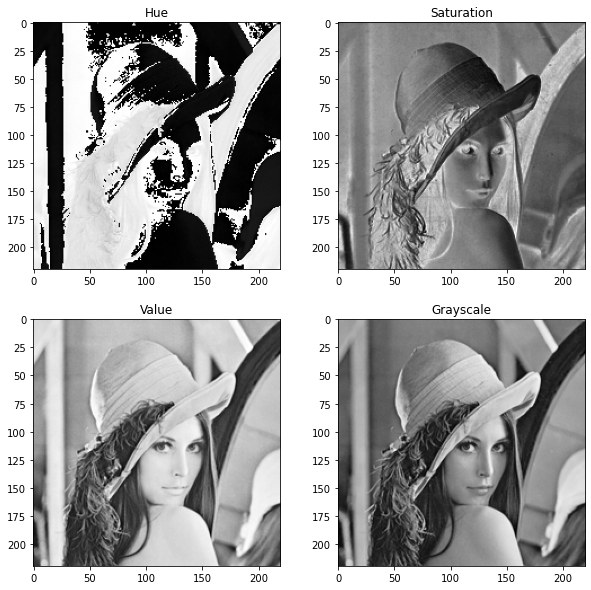

In [5]:
file_path = 'CV_PS_imgs/sample_imgs/hat_lady.png'
color_space(file_path)

## EXERCISE: 2D Convolution

In [6]:
"""
Write a program that performs a 2D convolution on the image 'hat_lady.png' with a 3x3 kernel, create a 
randomkernel with element values of your choice. Remember that if the kernel weights are too high or too 
low, the pixels get thresholded to 255 or 0 respectively. 
"""

def convolution(file_path, kernel):
    assert kernel.shape[0]==kernel.shape[1]
    
    #Read the image
    img = cv2.imread(file_path)
    
    #Convolution of the image
    conv_img = cv2.filter2D(img,-1,kernel)
    
    #Display the convolved image
    plt.figure(figsize=(6,6))
    plt.imshow(conv_img)
    plt.title('Convolution')

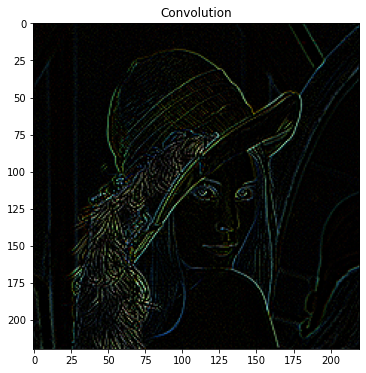

In [7]:
file_path = 'CV_PS_imgs/sample_imgs/hat_lady.png'

#Create kernel Edge Detection
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

convolution(file_path,kernel)

## EXERCISE: Edge Detection

In [8]:
"""
write a Program that performs Gaussian Bluriing and Canny edge Detection on 'hat_lady.png',
Display the Canny Output.
"""

def canny_edge_detection(file_path,ksize,maxval,minval):
    #Read image
    img = cv2.imread(file_path,0)
    
    #Gaussian Blur
    Gauss_blur_img = cv2.GaussianBlur(img,ksize,0,0)
    
    #Canny edge detection
    canny_edge = cv2.Canny(Gauss_blur_img,minval,maxval,ksize)
    
    #Display
    plt.figure(figsize=(6,6))
    plt.title('Canny Edge Detector')
    plt.imshow(canny_edge, cmap='gray')

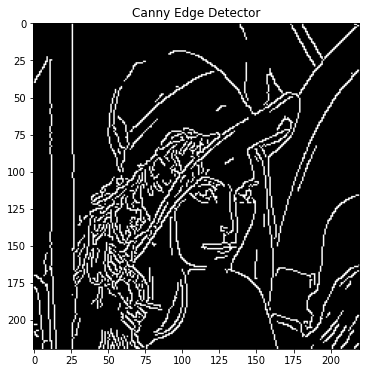

In [9]:
file_path = 'CV_PS_imgs/sample_imgs/hat_lady.png'
canny_edge_detection(file_path, 
                     ksize = (3,3),
                     maxval = 100, 
                     minval = 70)

# Lane Detection

In [10]:
"""Masking yellow and white, Guassian Blur and Canny Edge Detection"""
def img2edge(file_path,ksize,maxval,minval):
    #Read image
    img = cv2.imread(file_path,1)
    
    #Creating grayscale and HSV images
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    """Select a region of the image to operate on"""
    #selecting range of pixels using cv2.inrange for Yello
    lower_yellow = np.array([20,90,153])
    upper_yellow = np.array([31,255,255])
    
    #define the masks for yellow and white
    mask_yellow = cv2.inRange(hsv_img, lower_yellow,upper_yellow) 
    mask_white = cv2.inRange(grayscale,220,255)
    
    #combine the masks
    mask_yw = cv2.bitwise_or(mask_yellow,mask_white, mask=None)
    
    #Compute the final image for line detection
    yw_image = cv2.bitwise_and(grayscale, grayscale, mask=mask_yw)
    
    #Gaussian Blur
    Gauss_blur_img = cv2.GaussianBlur(yw_image,ksize,0,0)
    
    #Canny edge detection
    canny_edge = cv2.Canny(Gauss_blur_img,minval,maxval,ksize)
    
    return canny_edge


"""Select a region of the image to operate on"""
def roi_select(file_path,canny_output):
    #Read image
    img = cv2.imread(file_path,1)
    
    #Choose a region of Image
    upper_left =(int(img.shape[1]*0.4),int(img.shape[0]*0.34))
    lower_left = (0,img.shape[0])
    upper_right = (int(img.shape[1]*0.5),int(img.shape[0]*0.34))
    lower_right = (img.shape[1],img.shape[0])
    
    vertices = [np.array([upper_left,lower_left,lower_right,upper_right])]
    
    #Create Mask
    mask = np.zeros_like(canny_output)
    cv2.fillPoly(mask,vertices,255)
    
    return cv2.bitwise_and(canny_output,mask)
   
"""Hough Line prediction using Hough Transform for a straight Line"""
def draw_lines(file_path,canny_roi,rho_acc,theta_acc,thresh,minLL,maxLG):
    
    lines = cv2.HoughLinesP(canny_roi,rho_acc,theta_acc, 
                            threshold = thresh,
                            minLineLength = minLL,
                            maxLineGap = maxLG)
    
    #Define the mask
    mask = np.ones_like(canny_roi)
    
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_line = img[:,:,1].copy()
    
    for i in lines:
        for x1,y1,x2,y2 in i:
            cv2.line(img_line,(x1,y1),(x2,y2),(0,0,255),3)
            cv2.line(mask,(x1,y1),(x2,y2),(0,0,255),3)
            
    mask = (255-mask)
    img[:,:,1] = img_line
    
    return img, mask

In [11]:
def display_function(file_path): #define the function specfic parameters inside
    
    #Get the canny edge detection output
    canny_output = img2edge(file_path, ksize = (3,3), 
                            maxval = 100, 
                            minval = 50)
    
    #get region of interest output
    roi_output = roi_select(file_path,canny_output)
    
    #Get the line image
    img, line_img = draw_lines(file_path, roi_output,2,np.pi/180,50,50,100)
    
    #display all these
    fig,ax = plt.subplots(2,2,figsize=(10,7))
    ax[0,0].imshow(canny_output, cmap='gray')
    ax[0,0].set_title('Canny Edge Detector')
    ax[0,1].imshow(roi_output, cmap='gray')
    ax[0,1].set_title('Region of Interest Limitation')
    ax[1,0].imshow(line_img, cmap='gray')
    ax[1,0].set_title('Hough Line Image')
    ax[1,1].imshow(img)
    ax[1,1].set_title('Final Result')
    plt.tight_layout()

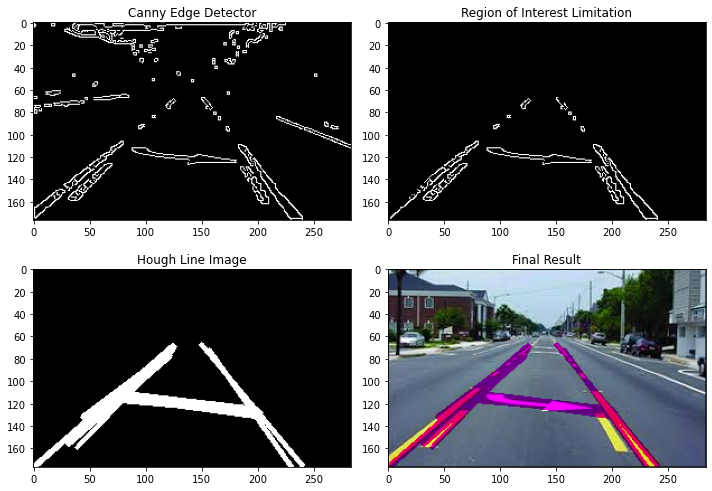

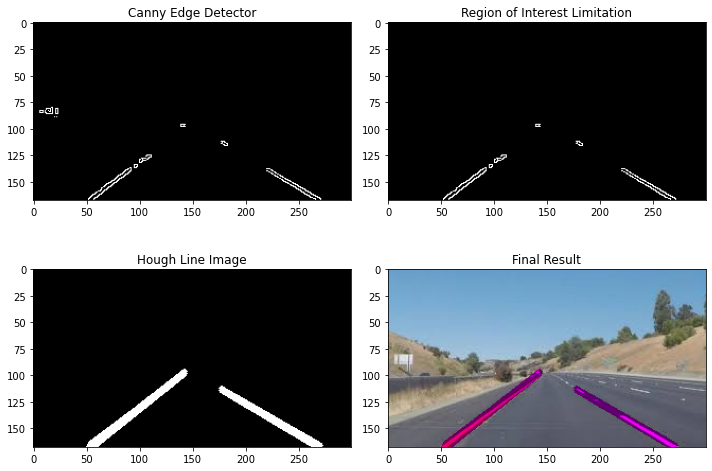

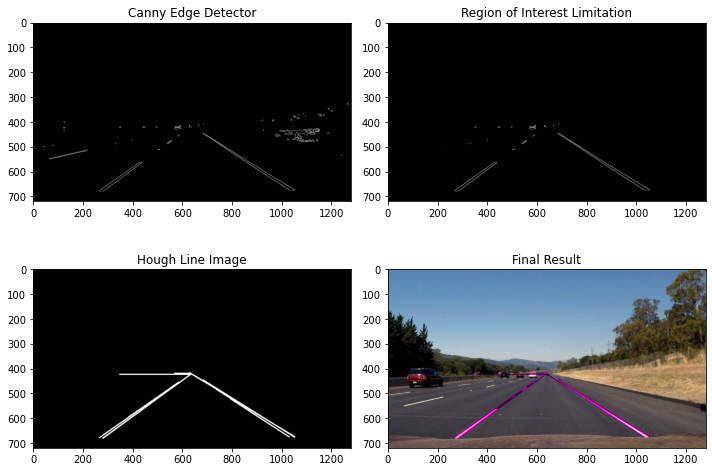

In [12]:
base_path = 'CV_PS_imgs/LD_test_imgs/'
file_names = ['test_img01.jpeg','test_img02.jpeg','test_img03.jpeg']

for i in file_names:
    file_path = base_path+str(i)
    display_function(file_path)

In [13]:
def draw_line(canny_roi,rho_acc,theta_acc,thresh,minLL,maxLG):
    
    lines = cv2.HoughLinesP(canny_roi,rho_acc,theta_acc, 
                            threshold = thresh,
                            minLineLength = minLL,
                            maxLineGap = maxLG)
    
    #Define the mask
    mask = np.ones_like(canny_roi)
    
    for i in lines:
        for x1,y1,x2,y2 in i:
            cv2.line(mask,(x1,y1),(x2,y2),(0,0,255),2)
            
    mask = (255-mask)
    
    return mask
file_path = 'CV_PS_imgs/LD_test_imgs/'+'test_img01.jpeg'
canny_output = img2edge(file_path, ksize = (3,3), 
                            maxval = 100, 
                            minval = 50)
roi_output = roi_select(file_path,canny_output)
line_img = draw_line(roi_output,2,np.pi/180,50,50,100)
img = cv2.imread(file_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)